# Laboratory exercise 4

## Warm-Up Mode (2 points)

**Task Description**  
Using the given dataset, develop and implement **3** different neural networks to predict the **air quality level**. Each network should differ in the following ways:  

- **layer configurations** - use different numbers and types of layers;
- **activation functions** - try different activation functions;
- **neurons per layer** - experiment with different numbers of neurons in each layer; and
- **number of layers** - build networks with varying depths.

After developing the models, evaluate and compare the performance of all **3** approaches.

**About the Dataset**  
This dataset focuses on air quality assessment across various regions. The dataset contains 5,000 samples and captures critical environmental and demographic factors that influence pollution levels.

**Features**:  
- **Temperature (°C)**: Average temperature of the region.  
- **Humidity (%)**: Relative humidity recorded in the region.  
- **PM2.5 Concentration (µg/m³)**: Levels of fine particulate matter.  
- **PM10 Concentration (µg/m³)**: Levels of coarse particulate matter.  
- **NO2 Concentration (ppb)**: Nitrogen dioxide levels.  
- **SO2 Concentration (ppb)**: Sulfur dioxide levels.  
- **CO Concentration (ppm)**: Carbon monoxide levels.  
- **Proximity to Industrial Areas (km)**: Distance to the nearest industrial zone.  
- **Population Density (people/km²)**: Number of people per square kilometer in the region.  

**Target Variable**: **Air Quality**  
- **Good**: Clean air with low pollution levels.  
- **Moderate**: Acceptable air quality but with some pollutants present.  
- **Poor**: Noticeable pollution that may cause health issues for sensitive groups.  
- **Hazardous**: Highly polluted air posing serious health risks to the population.  

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("pollution_dataset.csv")

In [3]:
data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
def label_data(data:pd.DataFrame, columns:list):
  encoder = LabelEncoder()
  data_copy = data.copy()

  for column in columns:
    data_copy[column] = encoder.fit_transform(data_copy[[column]].astype(str).values.ravel())
  return data_copy

In [6]:
data = label_data(data,['Air Quality'])

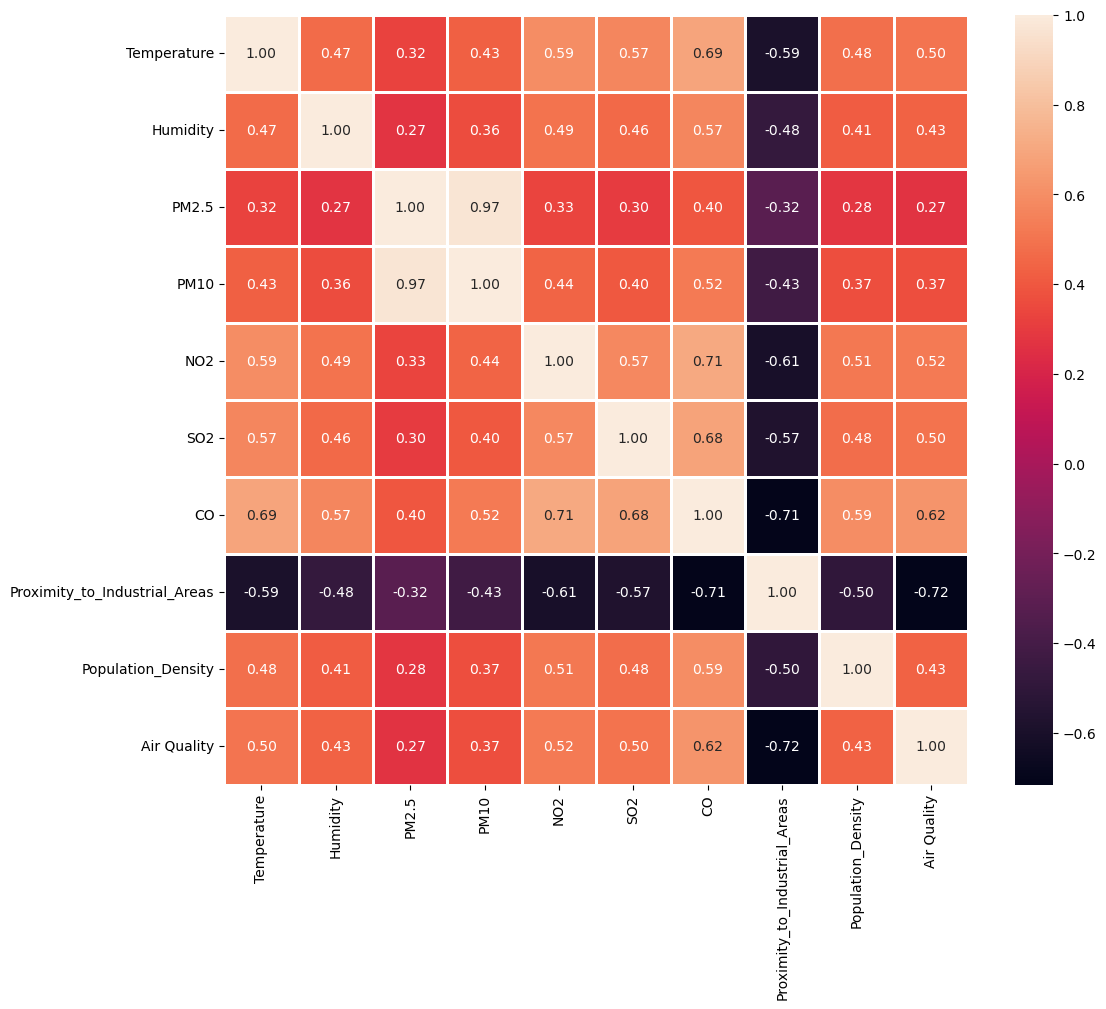

In [7]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

<Axes: xlabel='Air Quality', ylabel='count'>

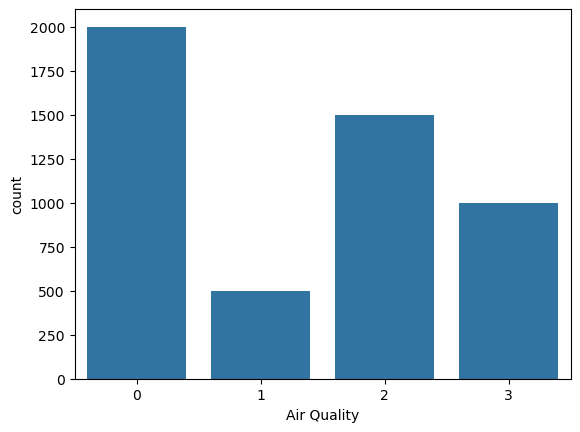

In [8]:
sns.countplot(data, x="Air Quality")

In [9]:
X, y = data.drop(columns=["Air Quality"]), data["Air Quality"]

In [15]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [83]:
model_1 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(32, activation='relu', input_shape=(X.shape[1],)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model_2 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(64, activation='tanh', input_shape=(X.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')
])

model_3 = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

models = [model_1, model_2, model_3]
for i, model in enumerate(models, 1):
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_list = []
for i, model in enumerate(models, 1):
    print(f"Training Model {i}...")
    history = model.fit(
        X_scaled, y,
        epochs=20,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )
    history_list.append(history)


Training Model 1...
Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4141 - loss: 1.2939 - val_accuracy: 0.6340 - val_loss: 0.9767
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6276 - loss: 0.8902 - val_accuracy: 0.7960 - val_loss: 0.6073
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7983 - loss: 0.5653 - val_accuracy: 0.8460 - val_loss: 0.4190
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8788 - loss: 0.4186 - val_accuracy: 0.9130 - val_loss: 0.3257
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9130 - loss: 0.3164 - val_accuracy: 0.9280 - val_loss: 0.2748
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9212 - loss: 0.2689 - val_accuracy: 0.9230 - val_loss: 0.2501
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9257 - loss: 0.2431 - val_accuracy: 0.9290 - val_loss: 0.2268
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9279 - loss: 0.214

In [90]:
pred_y = [probs.tolist().index(max(probs)) for probs in model_1.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.93      0.81      0.87       111
           2       0.95      0.97      0.96       294
           3       0.84      0.88      0.86       186

    accuracy                           0.95      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.95      0.95      0.95      1000

0.946


In [91]:
pred_y = [probs.tolist().index(max(probs)) for probs in model_2.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.93      0.76      0.84       111
           2       0.94      0.97      0.95       294
           3       0.83      0.87      0.85       186

    accuracy                           0.94      1000
   macro avg       0.92      0.90      0.91      1000
weighted avg       0.94      0.94      0.94      1000

0.94


In [92]:
pred_y = [probs.tolist().index(max(probs)) for probs in model_3.predict(test_X)]
print(classification_report(test_y, pred_y))
print(f1_score(test_y, pred_y, average='micro'))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.96      0.80      0.87       111
           2       0.95      0.98      0.96       294
           3       0.85      0.90      0.88       186

    accuracy                           0.95      1000
   macro avg       0.94      0.92      0.93      1000
weighted avg       0.95      0.95      0.95      1000

0.953
